# ADM HW 2. Questions 1,2,4,7

In [1]:
#Loading datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('/home/dias/Desktop/HW/2020-Feb.csv')
name ='February'
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-02-01 00:00:00 UTC,view,100010426,2232732115290555244,apparel.shoes,NaN,19.31,581521975,82d5664d-7980-43e1-ab27-a2f05e991760
1,2020-02-01 00:00:00 UTC,view,100071077,2232732079706079299,sport.bicycle,crown,11.88,596313635,3df590c0-e667-4f5a-aa87-f47749cd6408
2,2020-02-01 00:00:00 UTC,view,1004665,2232732093077520756,construction.tools.light,samsung,838.23,608821035,3e271f43-db51-46bd-b215-c2907ed1a204
3,2020-02-01 00:00:01 UTC,view,1002544,2232732093077520756,construction.tools.light,apple,410.42,530488542,21f46782-fb36-4d5c-82d4-6dc26ae93fad
4,2020-02-01 00:00:01 UTC,view,100010151,2053013563835941749,appliances.kitchen.refrigerators,pulser,332.03,583795643,eddfe0e2-12f8-4357-b453-00786c9b0319


In [2]:
#Setting numbers to show in float 
pd.set_option('float_format', '{:f}'.format)

In [3]:
#Getting information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55318565 entries, 0 to 55318564
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 3.7+ GB


In [4]:
df.describe()

,product_id,category_id,price,user_id
count,55318565.000000,55318565.000000,55318565.000000,55318565.000000
mean,27381805.495893,2188588624664425728.000000,287.715237,563342578.707838
std,36852430.241540,77317888520081120.000000,358.207423,38283256.618293
min,1000365.000000,2053013551857008896.000000,0.000000,12511517.000000
25%,1307546.000000,2232732061804790528.000000,61.780000,523514740.000000
50%,9300067.000000,2232732093077520640.000000,163.980000,563783317.000000
75%,28714345.000000,2232732098077131264.000000,350.050000,600972411.000000
max,100144758.000000,2250810931162382848.000000,2574.070000,622090716.000000


In [5]:
df.dtypes

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

## [RQ1] A marketing funnel describes your customer’s journey with your e-commerce. It may involve different stages, beginning when someone learns about your business, when he/she visits your website for the first time, to the purchasing stage, marketing funnels map routes to conversion and beyond. Suppose your funnel involves just three simple steps: 1) view, 2) cart, 3) purchase. Which is the rate of complete funnels? 

In [6]:
df.event_type.unique()

array(['view', 'cart', 'purchase'], dtype=object)

In [7]:
#Here I group all event_time values by product_id and user_id 
table1 = pd.pivot_table(df, values='event_time', index=['product_id','user_id'],
                    columns=['event_type'], aggfunc=len)
a=table1.dropna()
complete_funnels = a.min(axis=1).sum()
#I drop rows where at least one of them wasn't made, count sum and divide by total length
print('Rate of complete funnels in {} = {}'.format(name,complete_funnels/len(table1)))

Rate of complete funnels in February = 0.03333844678508341


### What’s the operation users repeat more on average within a session? Produce a plot that shows the average number of times users perform each operation (view/removefromchart etc etc).

In [8]:
#Here I grouped by session and took all average numbers of events in event_type
mean=[]
for i in df.event_type.unique():
    mean.append(df[df.event_type == i].groupby(['user_session']).event_type.count())
for i in range(len(mean)):
    mean[i]=mean[i].mean()
mean

[3.8761342662908507, 1.738195504030157, 1.5918664532309124]

The operation users repeat more on average within a session in February: 


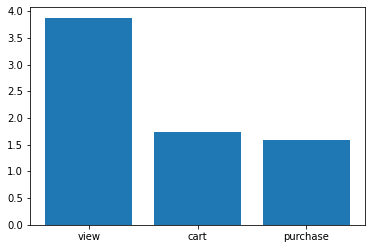

In [9]:
#and then plot a bar, and took tha name of event with highest number
plt.bar(df.event_type.unique(),mean);
print('The operation users repeat more on average within a session in {}: '.format(name, df.event_type.unique()[0]))

### How many times, on average, a user views a product before adding it to the cart?

In [4]:
#I made a pivot table of the times of first events that users made
table = pd.pivot_table(df, values='event_time', index=['product_id','user_id'],
                    columns=['event_type'], aggfunc=min)
table

event_type           cart purchase                     view
product_id user_id                                         
1000365    515048306  NaN      NaN  2020-02-01 12:10:13 UTC
1000544    516732222  NaN      NaN  2020-02-02 02:57:02 UTC
           561122507  NaN      NaN  2020-02-03 05:39:02 UTC
1000978    439613996  NaN      NaN  2020-02-01 12:01:07 UTC
           491409397  NaN      NaN  2020-02-19 07:29:07 UTC
...                   ...      ...                      ...
100144669  559505773  NaN      NaN  2020-02-29 17:08:29 UTC
           615472867  NaN      NaN  2020-02-29 15:58:59 UTC
100144755  571335273  NaN      NaN  2020-02-29 19:47:10 UTC
100144757  571335273  NaN      NaN  2020-02-29 19:47:51 UTC
100144758  571335273  NaN      NaN  2020-02-29 19:47:34 UTC

[29132311 rows x 3 columns]

In [5]:
#and then counted probability of user to view a product before buying
answer = len(table[table['view']<table['cart']])/len(table)
answer

0.041552213279612456

### What’s the probability that products added once to the cart are effectively bought?

In [6]:
# the same pivot from above, counting all rows with time of 'cart' before the 'purchase' and divide by total length
answer = len(table[table['cart']<table['purchase']])/len(table['cart'].dropna())
answer

0.42243422846169254

## [RQ2] What are the categories of the most trending products overall? For each month visualize this information through a plot showing the number of sold products per category. 

In [10]:
import seaborn as sns
#split category_code into 'category' and 'subcategory' columns
df[['category', 'subcategory']] = df['category_code'].str.split('.', 1, expand=True)
#count number of purchases of products and sort in descending order
group_purchase_by_cat=df[df['event_type']=='purchase'].groupby(['product_id','category']).count()

In [11]:
group_purchase_by_cat['user_id'].sort_values(ascending=False).head(10)
#As you can see the category of most trending products is electronics

product_id  category    
1004767     construction    39649
1005115     construction    37781
1005100     construction    30616
4804056     sport           25825
1002544     construction    24176
1005212     construction    20553
100068488   construction    17424
1005160     construction    16915
1005105     construction    15713
1004856     construction    12998
Name: user_id, dtype: int64

/home/dias/TTS/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of purchases')

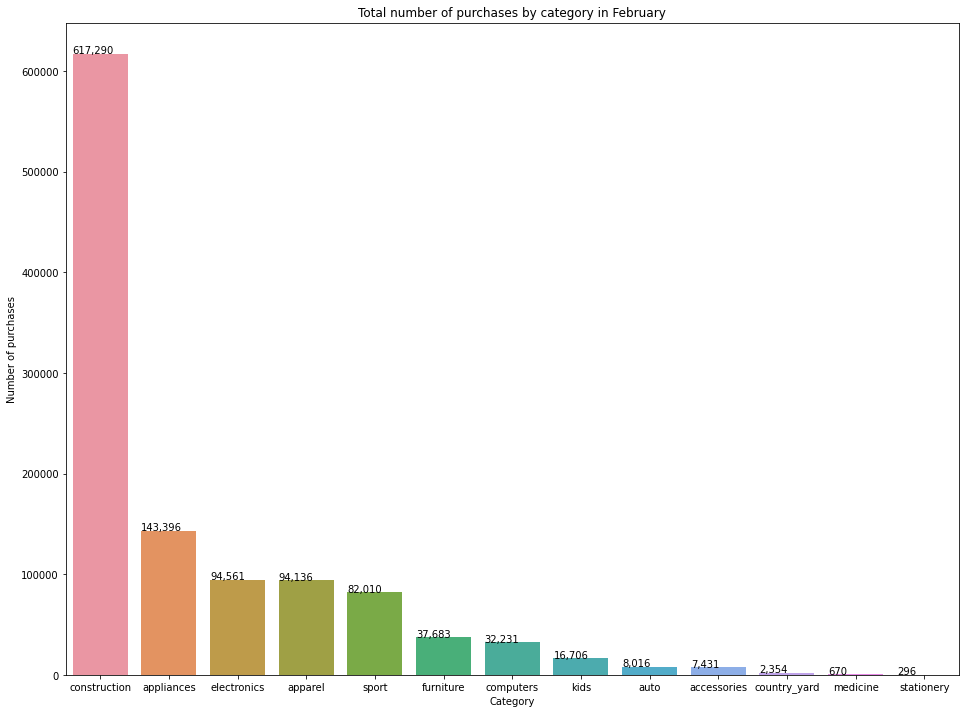

In [12]:
group_purchase_by_cat=df[df['event_type']=='purchase'].groupby(['category'])['price'].count()
sorted_group_purchase_by_cat = group_purchase_by_cat.dropna().sort_values(ascending=False)
plt.figure(figsize =(16, 12)) 
index_category = [str(i) for i in sorted_group_purchase_by_cat.index]
ax= sns.barplot(index_category,sorted_group_purchase_by_cat)
for p in ax.patches:
    ax.annotate(format(p.get_height(),',.0f'), (p.get_x() , p.get_height()),)
plt.title('Total number of purchases by category in {}'.format(name))
plt.xlabel('Category')
plt.ylabel('Number of purchases')

### Plot the most visited subcategories.

/home/dias/TTS/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of views')

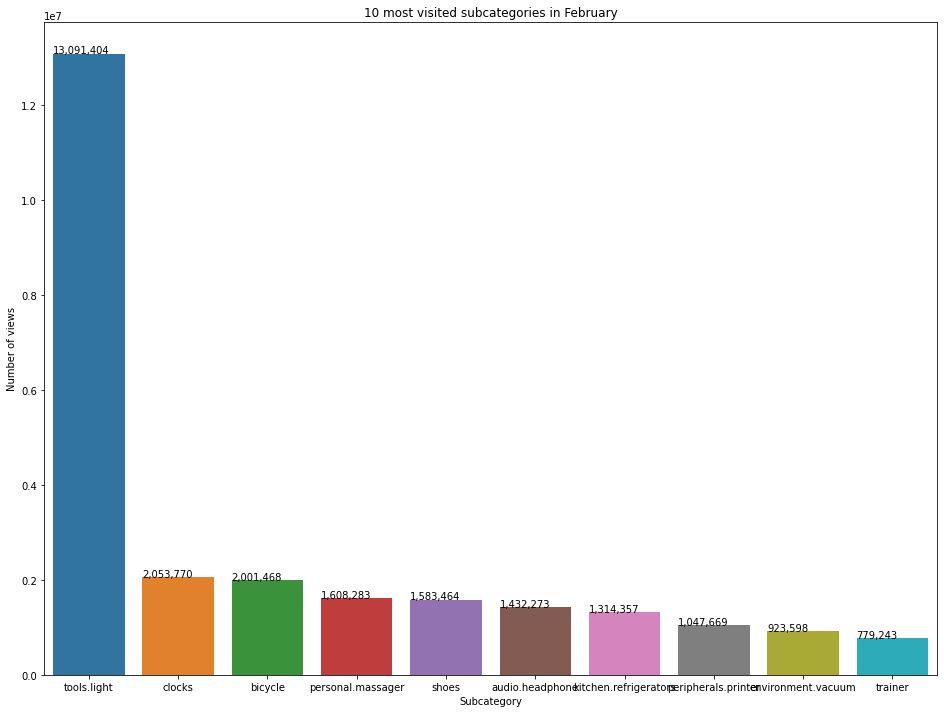

In [13]:
group_view_by_subcat=df[df['event_type']=='view'].groupby(['subcategory'])['price'].count()
sorted_group_view_by_subcat = group_view_by_subcat.dropna().sort_values(ascending=False)
plt.figure(figsize =(16, 12)) 
index_category = [str(i) for i in sorted_group_view_by_subcat.index]
ax= sns.barplot(index_category[:10],sorted_group_view_by_subcat[:10])
for p in ax.patches:
    ax.annotate(format(p.get_height(),',.0f'), (p.get_x() , p.get_height()),)
plt.title('10 most visited subcategories in {}'.format(name))
plt.xlabel('Subcategory')
plt.ylabel('Number of views')

### What are the 10 most sold products per category?

In [14]:
bf = df['category'].unique()
for i in bf:
    try:
        #make pivot table for each category, and sort values in descending order
        table4 = pd.pivot_table(df[df['category']==i], values='event_time', index=['category','product_id'],
                        columns=['event_type'], aggfunc=len)
        print(table4['purchase'].dropna().sort_values(ascending =False)[:9])
    except:
        print('No purchases in {}'.format(i))

category  product_id
apparel   5100816      8937.000000
          4100346      1708.000000
          4100126      1446.000000
          5100503      1104.000000
          1200947      1082.000000
          16500007      927.000000
          100060825     892.000000
          100058915     836.000000
          1201504       812.000000
Name: purchase, dtype: float64
category  product_id
sport     4804056      25825.000000
          4804055       9083.000000
          4804718       6092.000000
          4803977       4014.000000
          4804660       3890.000000
          4804295       3581.000000
          4803976       1050.000000
          100036138      684.000000
          4803878        563.000000
Name: purchase, dtype: float64
category      product_id
construction  1004767      39649.000000
              1005115      37781.000000
              1005100      30616.000000
              1002544      24176.000000
              1005212      20553.000000
              100068488    17424

## [RQ4] How much does each brand earn per month? 

In [15]:
#made a pivot table to sum the selling price per each brand
brand_sum = pd.pivot_table(df, values='price', index=['brand'],
                    columns=['event_type'], aggfunc=sum)
brand_sum

event_type,cart,purchase,view
brand,,,
a-case,4304.660000,1335.770000,206598.080000
a-derma,395.620000,94.080000,11365.570000
a-elita,33.960000,8.490000,1551.030000
a-mega,1029.550000,432.450000,16334.340000
a-toys,30.890000,61.780000,1104.340000
...,...,...,...
zvezda,19.820000,nan,23.940000
zwerg,nan,nan,590.430000
zwilling,1031.970000,nan,272434.170000


In [16]:
#How much does each brand earn per month?
brand_revenue = brand_sum['purchase'].sort_values(ascending=False)
brand_revenue

brand
apple      191755567.649981
samsung     74269250.379974
xiaomi      17702877.470003
huawei       7667155.309999
lucente      5917410.990000
                 ...       
zuru                    nan
zvezda                  nan
zwerg                   nan
zwilling                nan
zx                      nan
Name: purchase, Length: 4658, dtype: float64

### Write a function that given the name of a brand in input returns, for each month, its profit.

In [17]:
# Function that given the name of a brand in input returns, for each month, its profit. 
def profit_of_brand(brand_name,month):
    return month['purchase'][brand_name]

def profit_of_brand_for_each_month(brand_name,list_of_months):
    return [i['purchase'][brand_name] for i  in list_of_months]

### Is the average price of products of different brands significantly different? 

In [18]:
#Is the average price of products of different brands significantly different? 

table3 = pd.pivot_table(df, values='price', index=['subcategory','brand'],

                    columns=['event_type'], aggfunc='mean')
table3[:50]


event_type                                     cart   purchase       view
subcategory             brand                                            
accessories.alarm       absolutechampion  10.300000        nan  10.300000
                        appollo                 nan        nan  54.060000
                        autoline                nan        nan 353.380000
                        body-solid              nan        nan 341.320000
                        cenmax                  nan        nan 100.390000
                        centurion         33.460000  33.460000  33.460000
                        dds              296.073714 305.899388 320.276784
                        domyos           100.390000        nan 100.390000
                        dsk               72.210000        nan  70.135329
                        kenwood                 nan        nan 240.657209
                        kgb                     nan        nan  84.940000
                        mydean           128.700000        nan 128.700000
                        pandora          165.482500        nan 213.866552
                        pioneer           64.350000  64.350000  64.350000
                        romana            71.808000  65.686667  73.199404
                        scher-khan        72.070000        nan 113.901250
                        silapro           15.960000  15.960000  15.960000
                        sparta            29.320000  29.320000  29.320000
                        starline         215.255000 217.250000 213.262183
                        swat              40.879200  40.673333  42.220596
                        tomahawk          89.125000        nan  86.759412
                        torneo            22.650000  22.650000  22.650000
                        tuka              16.730000  16.730000  16.730000
accessories.anti_freeze adel              22.720000        nan  25.140000
                        alexrojo          38.610000        nan  46.330000
                        alvitek           15.570000        nan  24.927857
                        barokko           13.020000        nan  11.396250
                        bartek            46.080000        nan  47.390000
                        belezza                 nan        nan  20.890000
                        biomecanics       43.964000  46.330000  38.504137
                        bugaboo                 nan        nan 141.550000
                        burton                  nan        nan 631.560000
                        casaconforte            nan        nan  17.140000
                        elegant           11.070000        nan  16.674444
                        garvalin          40.444167  46.330000  39.121734
                        intex             55.920000        nan  57.888567
                        koopman                 nan        nan  36.030000
                        minimen           42.658571  42.046667  40.862615
                        neposeda          25.230000        nan  25.230000
                        pablosky          42.707917  44.746667  47.887644
                        stolicatekstila   35.140000        nan  31.633333
                        timson            15.559920  15.494167  15.750086
                        tyr                     nan        nan  35.520000
                        unison                  nan        nan  16.910000
                        verran                  nan        nan  30.890000
                        vladi             37.840000        nan  35.414872
accessories.compressor  intex             82.200000        nan  71.970952
                        airline           48.312727  48.304211  48.483650
                        alligator               nan        nan  59.980000
                        aquamarine        23.593333  16.730000  26.534762

##  [RQ7] The Pareto principle states that for many outcomes roughly 80% of consequences come from 20% of the causes. Also known as 80/20 rule, in e-commerce simply means that most of your business, around 80%, likely comes from about 20% of your customers.

    Prove that the pareto principle applies to your store.


In [19]:
group_purchase_by_user=df[df['event_type']=='purchase'].groupby(['user_id'])['price'].sum()
sorted_group_purchase_by_user = group_purchase_by_user.dropna().sort_values(ascending=False)
sorted_group_purchase_by_user
#Group by user and sort all purchases by descending order

user_id
563051763   302725.800000
610871788   292203.440000
529168923   277318.260000
598224683   247693.960000
569374504   235510.520000
                 ...     
611172219        0.850000
576888935        0.850000
610255823        0.800000
616199049        0.790000
609731500        0.770000
Name: price, Length: 392356, dtype: float64

In [20]:
group_purchase_by_product=df[df['event_type']=='purchase']['price'].sum()
group_purchase_by_product
#get all the revenue that was made in this month

381178935.4199997

Percent of money 20 % of customers gave out of total 381178935.4199997: 72.91701512145397%


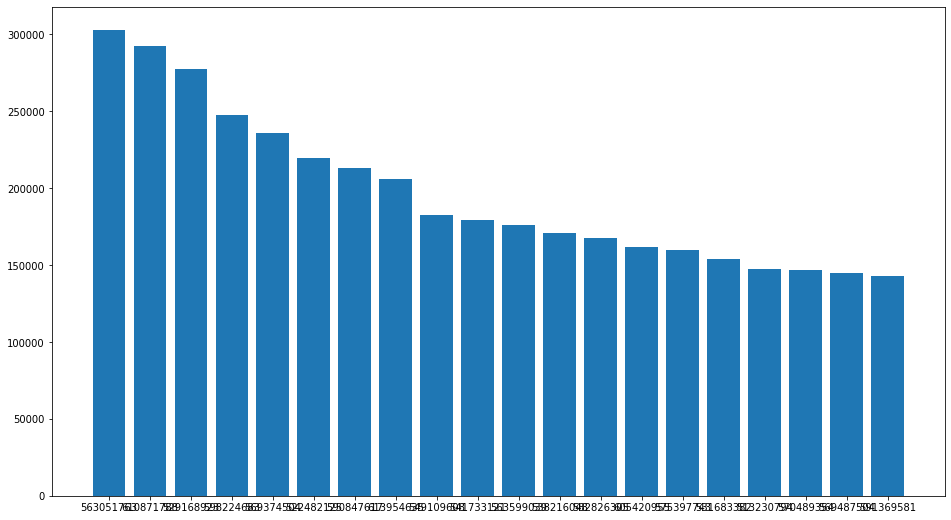

In [21]:
plt.figure(figsize =(16, 9)) 
amount_of_20percent_customers = len(sorted_group_purchase_by_user) * 0.2
#Count % of money that 20% of top customers gave
index_user = [str(i) for i in sorted_group_purchase_by_user.index]
plt.bar(index_user[:20],sorted_group_purchase_by_user[:20])
print('Percent of money 20 % of customers gave out of total {}: {}%'.format(group_purchase_by_product,sum(sorted_group_purchase_by_user[:int(amount_of_20percent_customers)]) /(group_purchase_by_product/100) ))